In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Downloads\coffee_shop_revenue.csv')
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [4]:
# checking null values
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [5]:
# checking duplicate values
df.duplicated().sum()

0

In [8]:
df.drop("Number_of_Employees",axis = 1,inplace=True)
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,106.62,97,1547.81
1,485,4.50,12,57.83,744,2084.68
2,398,9.09,6,91.76,636,3118.39
3,320,8.48,17,462.63,770,2912.20
4,156,7.44,17,412.52,232,1663.42
...,...,...,...,...,...,...
1995,372,6.41,11,466.11,913,2816.85
1996,105,3.01,11,12.62,235,337.97
1997,89,5.28,16,376.64,310,951.34
1998,403,9.41,7,452.49,577,4266.21


In [9]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,499.740000,999.000000,5114.600000


In [10]:
df.shape

(2000, 6)

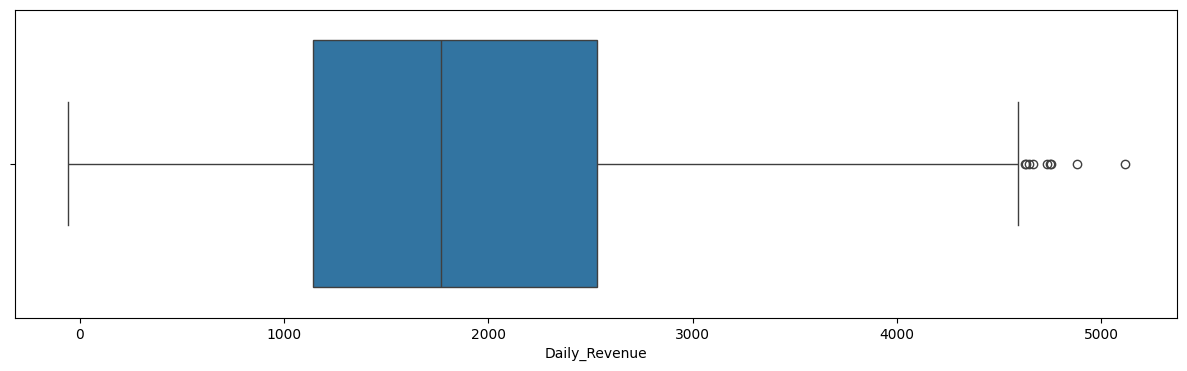

<Figure size 640x480 with 0 Axes>

In [34]:
# checking for outlier 
plt.figure(figsize=(15,4))
sns.boxplot(x="Daily_Revenue",data=df)
plt.show()
plt.savefig("outlier.jpg")

In [13]:
# remove the outlier 
q1 = df["Daily_Revenue"].quantile(0.25)
q3 = df ["Daily_Revenue"].quantile(0.75)
IQR= (q3 - q1)


In [14]:
min_range= q1 -(1.5*IQR)
max_range=q3 +(1.5*IQR)
df1=df[df["Daily_Revenue"]<= max_range]

In [15]:
df1

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,106.62,97,1547.81
1,485,4.50,12,57.83,744,2084.68
2,398,9.09,6,91.76,636,3118.39
3,320,8.48,17,462.63,770,2912.20
4,156,7.44,17,412.52,232,1663.42
...,...,...,...,...,...,...
1995,372,6.41,11,466.11,913,2816.85
1996,105,3.01,11,12.62,235,337.97
1997,89,5.28,16,376.64,310,951.34
1998,403,9.41,7,452.49,577,4266.21


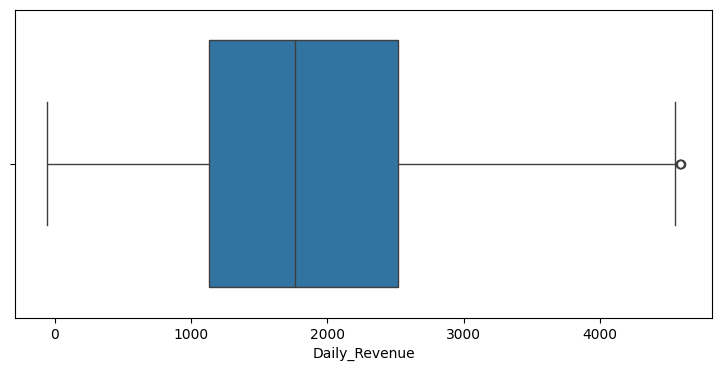

In [16]:
# checking for outlier 
plt.figure(figsize=(9,4))
sns.boxplot(x="Daily_Revenue",data=df1)
plt.show()

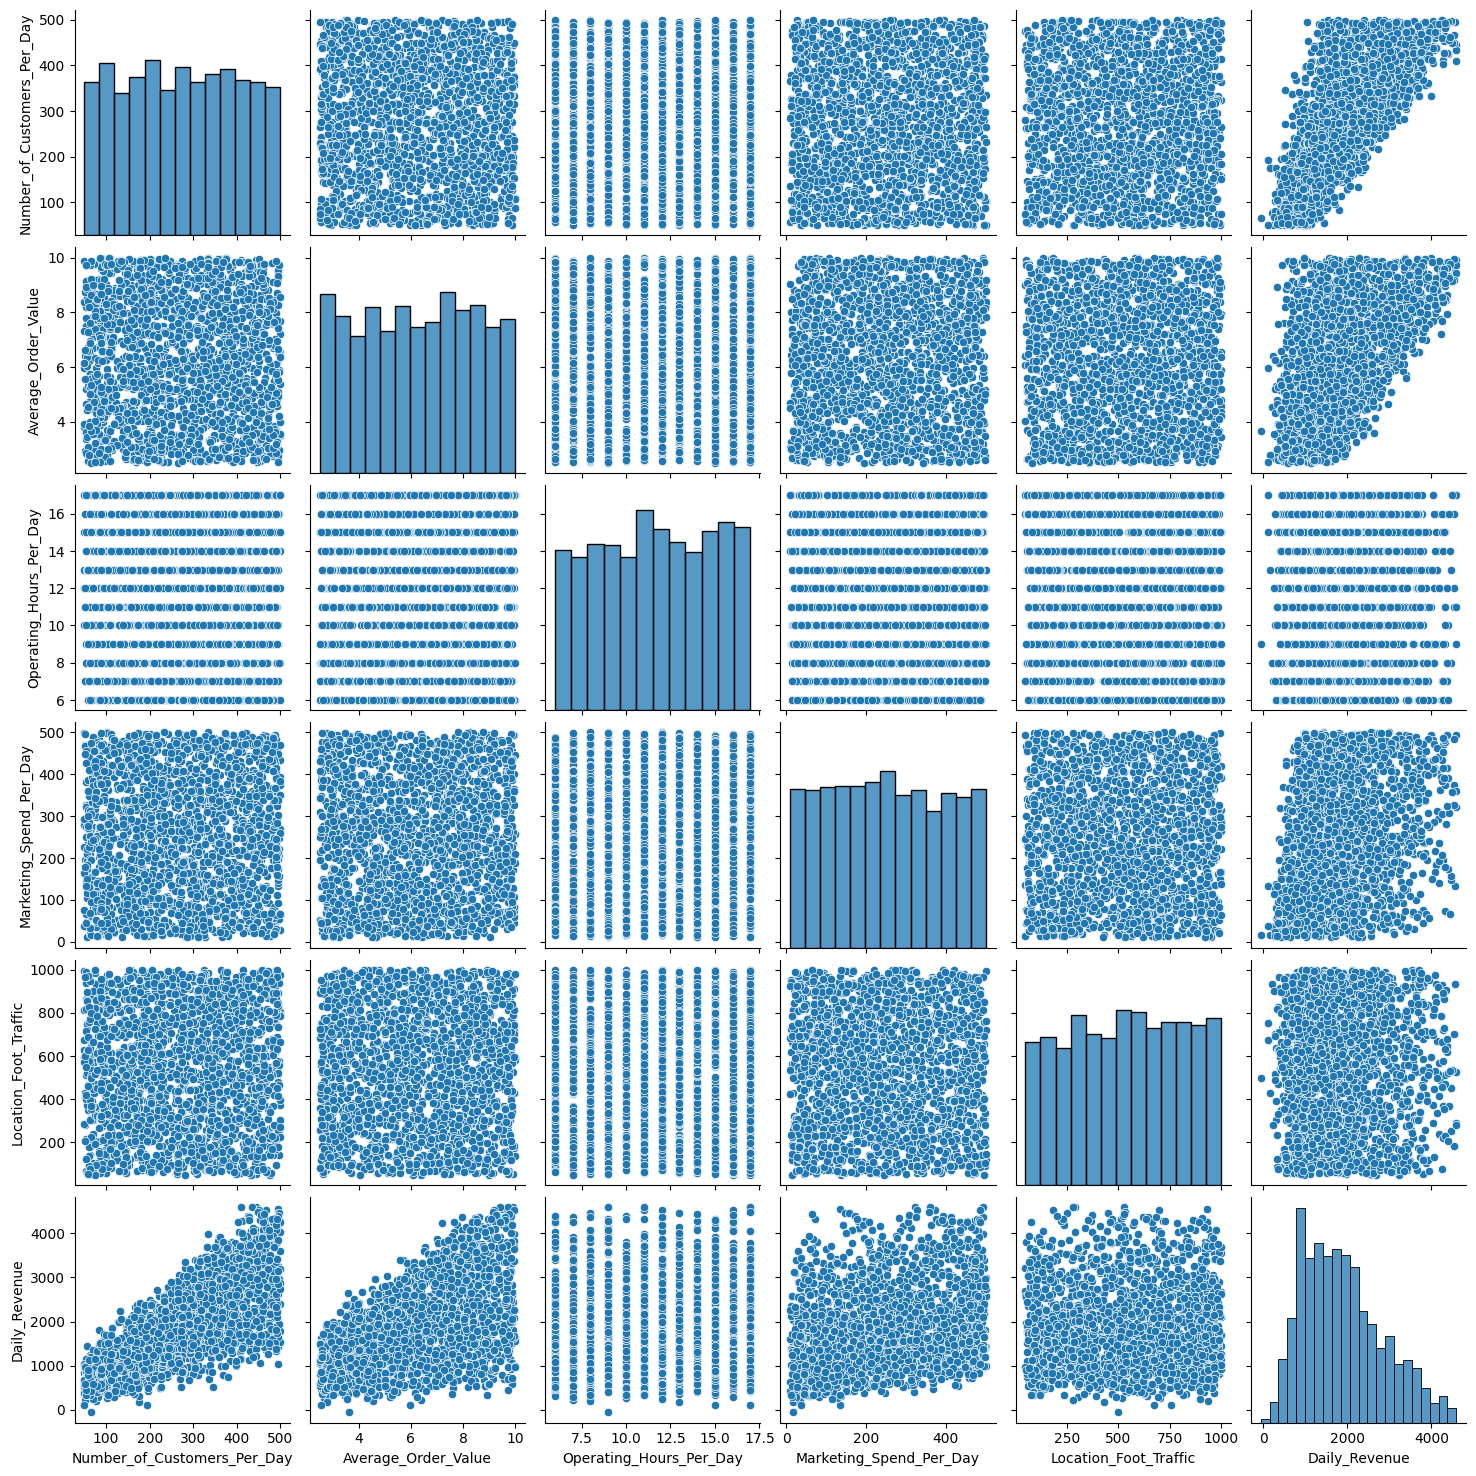

In [18]:
sns.pairplot(data=df1)
plt.show()

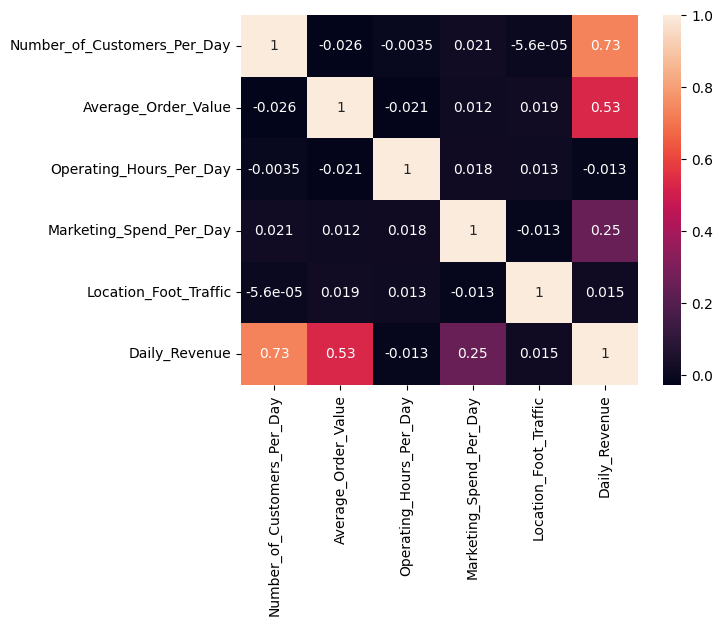

<Figure size 640x480 with 0 Axes>

In [19]:
sns.heatmap(data=df1.corr(),annot=True)
plt.show()
plt.savefig("heatmap.jpg")

In [21]:
# from this 2 graph we understand that Operating_Hours_Per_Day and Location_Foot_Traffic have no linear relation so we drop this 2 column
df1.drop("Location_Foot_Traffic",axis=1,inplace=True)
df1.drop("Operating_Hours_Per_Day",axis=1,inplace=True)
df1

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Daily_Revenue
0,152,6.74,106.62,1547.81
1,485,4.50,57.83,2084.68
2,398,9.09,91.76,3118.39
3,320,8.48,462.63,2912.20
4,156,7.44,412.52,1663.42
...,...,...,...,...
1995,372,6.41,466.11,2816.85
1996,105,3.01,12.62,337.97
1997,89,5.28,376.64,951.34
1998,403,9.41,452.49,4266.21


In [23]:
x= df1.iloc[:, :3]
y=df1["Daily_Revenue"]

In [24]:
x

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day
0,152,6.74,106.62
1,485,4.50,57.83
2,398,9.09,91.76
3,320,8.48,462.63
4,156,7.44,412.52
...,...,...,...
1995,372,6.41,466.11
1996,105,3.01,12.62
1997,89,5.28,376.64
1998,403,9.41,452.49


In [25]:
y

0       1547.81
1       2084.68
2       3118.39
3       2912.20
4       1663.42
         ...   
1995    2816.85
1996     337.97
1997     951.34
1998    4266.21
1999     914.24
Name: Daily_Revenue, Length: 1991, dtype: float64

In [26]:
# split the data into 2 parts
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=35)

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.score(x_test,y_test)*100

90.14407476562933

In [29]:
# testing data
y_pred=lr.predict(x_test)


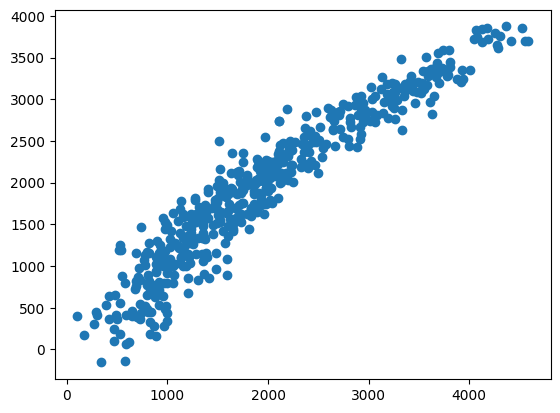

In [30]:
# compare y_test and y_predict
plt.scatter(y_test,y_pred)

plt.show()

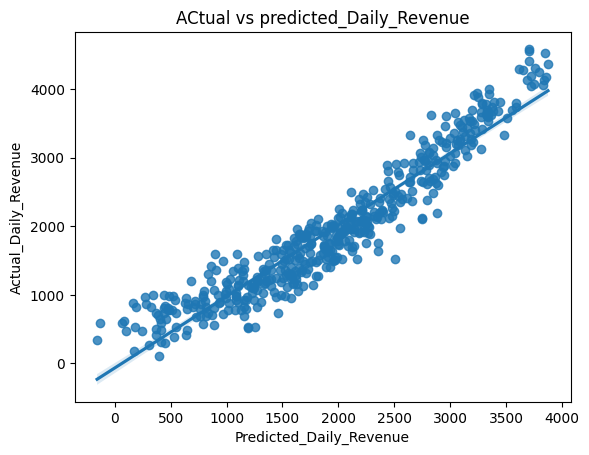

<Figure size 640x480 with 0 Axes>

In [31]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted_Daily_Revenue")
plt.ylabel('Actual_Daily_Revenue')
plt.title("Actual vs predicted_Daily_Revenue")
plt.show()
plt.savefig("Daily_Revenue_prediction.jpg")

In [36]:
lr.coef_

array([  5.46355433, 238.07113104,   1.53244795])

In [33]:
lr.intercept_

-1466.7042318707547